In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
Traindf=pd.read_csv('Final_Train.csv')

In [4]:
Traindf.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
Traindf.shape


(5961, 7)

In [6]:
Traindf.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [7]:
Testdf=pd.read_csv('Final_Test.csv')

In [8]:
Testdf.shape

(1987, 6)

In [9]:
Testdf.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [10]:
Traindf['Data']='Train'
Testdf['Data']='Test'
Testdf['Fees']=0

In [11]:
df=pd.concat([Traindf,Testdf])
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Data
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Train


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       7948 non-null   object
 1   Experience          7948 non-null   object
 2   Rating              3556 non-null   object
 3   Place               7917 non-null   object
 4   Profile             7948 non-null   object
 5   Miscellaneous_Info  4494 non-null   object
 6   Fees                7948 non-null   int64 
 7   Data                7948 non-null   object
dtypes: int64(1), object(7)
memory usage: 558.8+ KB


In [13]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                     0
Data                     0
dtype: int64

In [14]:
df['Experience']=df['Experience'].str.split(' ').str[0]

In [15]:
df['Experience']=df['Experience'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       7948 non-null   object
 1   Experience          7948 non-null   int32 
 2   Rating              3556 non-null   object
 3   Place               7917 non-null   object
 4   Profile             7948 non-null   object
 5   Miscellaneous_Info  4494 non-null   object
 6   Fees                7948 non-null   int64 
 7   Data                7948 non-null   object
dtypes: int32(1), int64(1), object(6)
memory usage: 527.8+ KB


In [17]:
df["Place"].fillna("Unknown,Unknown",inplace=True)
df["Place"] = df["Place"].str.split(",")
df["City"] = df["Place"].str[-1]
df["Place"] = df["Place"].str[0]

In [18]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                    0
Profile                  0
Miscellaneous_Info    3454
Fees                     0
Data                     0
City                     0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['City']=le.fit_transform(df['City'])
df['Place']=le.fit_transform(df['Place'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       7948 non-null   object
 1   Experience          7948 non-null   int32 
 2   Rating              3556 non-null   object
 3   Place               7948 non-null   int32 
 4   Profile             7948 non-null   object
 5   Miscellaneous_Info  4494 non-null   object
 6   Fees                7948 non-null   int64 
 7   Data                7948 non-null   object
 8   City                7948 non-null   int32 
dtypes: int32(3), int64(1), object(5)
memory usage: 527.8+ KB


In [21]:
#profile column
df['Profile'].value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

In [22]:
df['Profile']=le.fit_transform(df['Profile'])

In [23]:
#rating column
df['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%', '52%'],
      dtype=object)

In [24]:
df['Rating']=df['Rating'].str.split('%').str[0]

In [25]:
df['Rating'].fillna('0',inplace=True)

In [26]:
df['Rating']=df['Rating'].astype(int)

In [27]:
#qualification column
df['Qualification'].value_counts()

BDS                                                                                                                    632
BHMS                                                                                                                   627
BAMS                                                                                                                   624
MBBS                                                                                                                   441
MBBS, MS - ENT                                                                                                         280
                                                                                                                      ... 
MD - Skin,VD & Leprosy, MBBS, DNB - Dermatology & Venereology                                                            1
MBBS, MD - Obstetrics & Gynaecology, MRCOG(UK)                                                                           1
MBBS, DNB - Gene

In [28]:
df['Qual_1']=df['Qualification'].str.split(',').str[0]

In [29]:
def rep(x):
    if x=='0':
        x=0
    else:
        x=1
        return x

In [30]:
df['Qual_1']= df['Qual_1'].apply(lambda x:rep(x))

In [31]:
df['Qual_2']=df['Qualification'].str.split(',').str[1]

In [32]:
df['Qual_2'].fillna('0',inplace=True)

df['Qual_2']= df['Qual_2'].apply(lambda x:rep(x))

In [33]:
df['Qual_2'].isnull().sum()

2571

In [34]:
df['Qual_2'].fillna(0,inplace=True)

df['Qual_2'].unique()

array([1., 0.])

In [35]:
df['Qual_2']=df['Qual_2'].astype(int)

In [36]:
df['Qual_3']=df['Qualification'].str.split(',').str[2]

df['Qual_3'].fillna('0',inplace=True)

df['Qual_3']= df['Qual_3'].apply(lambda x:rep(x))

df['Qual_3'].isnull().sum()

6088

In [37]:
df['Qual_3'].fillna(0,inplace=True)

df['Qual_3'].unique()

array([0., 1.])

In [38]:
df['Qual_3']=df['Qual_3'].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       7948 non-null   object
 1   Experience          7948 non-null   int32 
 2   Rating              7948 non-null   int32 
 3   Place               7948 non-null   int32 
 4   Profile             7948 non-null   int32 
 5   Miscellaneous_Info  4494 non-null   object
 6   Fees                7948 non-null   int64 
 7   Data                7948 non-null   object
 8   City                7948 non-null   int32 
 9   Qual_1              7948 non-null   int64 
 10  Qual_2              7948 non-null   int32 
 11  Qual_3              7948 non-null   int32 
dtypes: int32(7), int64(2), object(3)
memory usage: 589.9+ KB


In [40]:
df.drop(['Qualification'],axis=1,inplace=True)

In [41]:
#Miscellaneous_info column

In [42]:
df['Miscellaneous_Info'].nunique()

3988

In [43]:
df['Miscellaneous_Info'].fillna('Missing',inplace=True)

In [44]:
df['Miscellaneous_Info'].value_counts()

Missing                                                               3454
Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth      50
Skin Allergy Treatment Skin Allergies Dermabrasion                      18
Tooth Extraction Dental Fillings Scaling / Polishing                    16
Dental Fillings Zirconia Crowns Dental Implant Fixing                   15
                                                                      ... 
95% 5 Feedback Kondapur, Hyderabad                                       1
99% 7 Feedback Vyttila, Ernakulam                                        1
100% 6 Feedback Andheri West, Mumbai                                     1
Endosurgery RCT - Root Canal Treatment Endodontic Retreatment            1
83% 5 Feedback RT Nagar, Bangalore                                       1
Name: Miscellaneous_Info, Length: 3989, dtype: int64

In [45]:
df.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [46]:
df.head()

,Experience,Rating,Place,Profile,Fees,Data,City,Qual_1,Qual_2,Qual_3
0,24,100,324,5,100,Train,4,1,1,0
1,12,98,926,0,350,Train,0,1,1,0
2,9,0,494,3,300,Train,0,1,1,0
3,12,0,74,0,250,Train,0,1,1,0
4,20,100,367,0,250,Train,1,1,0,0


In [47]:
df['Total_qual']=df.iloc[:,-3:].sum(axis=1)

In [48]:
df.drop(df.columns[[6,7,8]], axis = 1, inplace = True)

In [49]:
df.head()

,Experience,Rating,Place,Profile,Fees,Data,Qual_3,Total_qual
0,24,100,324,5,100,Train,0,2
1,12,98,926,0,350,Train,0,2
2,9,0,494,3,300,Train,0,2
3,12,0,74,0,250,Train,0,2
4,20,100,367,0,250,Train,0,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Experience  7948 non-null   int32 
 1   Rating      7948 non-null   int32 
 2   Place       7948 non-null   int32 
 3   Profile     7948 non-null   int32 
 4   Fees        7948 non-null   int64 
 5   Data        7948 non-null   object
 6   Qual_3      7948 non-null   int32 
 7   Total_qual  7948 non-null   int64 
dtypes: int32(5), int64(2), object(1)
memory usage: 403.6+ KB


In [51]:
Trainfinal=df.loc[df['Data']=='Train']
Testfinal=df.loc[df['Data']=='Test']

In [52]:
Trainfinal.drop(['Data'],axis=1,inplace=True)
Testfinal.drop(['Data'],axis=1,inplace=True)

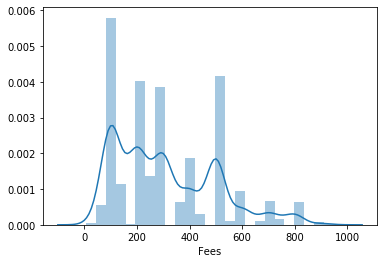

In [53]:
sns.distplot(Trainfinal['Fees'])

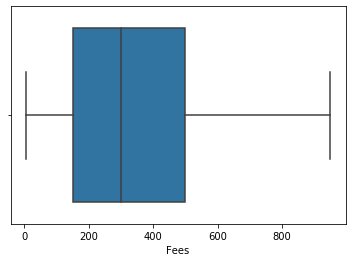

In [54]:
sns.boxplot(Trainfinal['Fees'])

In [55]:
x=Trainfinal.drop(['Fees'],axis=1)
x.head()

,Experience,Rating,Place,Profile,Qual_3,Total_qual
0,24,100,324,5,0,2
1,12,98,926,0,0,2
2,9,0,494,3,0,2
3,12,0,74,0,0,2
4,20,100,367,0,0,1


In [56]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [57]:
y=Trainfinal['Fees']
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split,cross_val_score

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=97)

In [61]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [62]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
SV=SVR()
DTR=DecisionTreeRegressor(random_state=97)
ABR=AdaBoostRegressor(random_state=97)
RFR=RandomForestRegressor(random_state=97)
GBR=GradientBoostingRegressor(random_state=97)


In [63]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('SVR',SV))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [67]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
rmse=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    b=np.sqrt(mse)
    print('RMSE= ',b)
    rmse.append(b)
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression()
R2_score =  0.08543339154104224
Mean_Squared_Error = 33309.24635124849
RMSE=  182.50820899687906
Cross_Val_Score =  0.10552463820191216


********************************* Lasso *********************************

 Lasso()
R2_score =  0.08545826024093084
Mean_Squared_Error = 33308.340613335735
RMSE=  182.50572761789076
Cross_Val_Score =  0.10511380600332361


********************************* Ridge *********************************

 Ridge()
R2_score =  0.08543223310134418
Mean_Squared_Error = 33309.28854254755
RMSE=  182.5083245842434
Cross_Val_Score =  0.10552509070135688


********************************* ElasticNet *********************************

 ElasticNet()
R2_score =  0.07396369658293445
Mean_Squared_Error = 33726.98180255371
RMSE=  183.649072424975
Cross_Val_Score =  0.08849929010401601


********************************* DecisionTreeRegressor **************************

In [68]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'RMSE' : rmse ,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,RMSE,Cross_val_score
0,LinearRegression,0.085433,33309.246,182.508209,0.105525
1,Lasso,0.085458,33308.341,182.505728,0.105114
2,Ridge,0.085432,33309.289,182.508325,0.105525
3,ElasticNet,0.073964,33726.982,183.649072,0.088499
4,DecisionTreeRegressor,-0.573685,57314.869,239.405239,-0.583941
5,SVR,0.050397,34585.299,185.971232,0.075765
6,KNeighborsRegressor,0.026075,35471.115,188.337769,0.020455
7,AdaBoostRegressor,0.108316,32475.847,180.210563,0.115052
8,RandomForestRegressor,0.085536,33305.496,182.497934,0.129340
9,GradientBoostingRegressor,0.180696,29839.705,172.741729,0.194680


In [69]:
#I choose GradientBoostingRegressor as my final model because it has very less Root_Mean_Squared_Error

RMSE = 172.700483

In [70]:
from sklearn import externals
import joblib
joblib.dump(GBR,'doctor_consultation.pkl')

['doctor_consultation.pkl']